<a href="https://colab.research.google.com/github/manu123416/c2q_study/blob/master/linear_classifier_with_featureMap_phi_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
from os import system as sys

import matplotlib.pyplot as pyplot
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics.pairwise import rbf_kernel 

Implemnting the below formula:
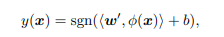

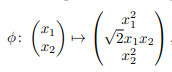

In [4]:
data = pd.read_csv('weather.csv', parse_dates = True, index_col=0)
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [5]:
data.isnull().sum()

MinTemp             3
MaxTemp             2
Rainfall            6
Evaporation        51
Sunshine           16
WindGustDir      1036
WindGustSpeed    1036
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        14
Humidity3pm        13
Pressure9am        20
Pressure3pm        19
Cloud9am          566
Cloud3pm          561
Temp9am             4
Temp3pm             4
RainToday           6
RISK_MM             0
RainTomorrow        0
dtype: int64

In [6]:
dataset = data[['Humidity3pm','Pressure3pm','RainTomorrow']].dropna()

In [7]:
X = dataset[['Humidity3pm','Pressure3pm']].values
y = dataset['RainTomorrow']
y = np.array([-1 if value == 'No' else 1 for value in y])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
# Transform X 
def transform(X):
    temp1 = X[:,0]*X[:,0]
    temp1_vector = temp1[:, np.newaxis]
   
    temp2 = np.sqrt(2)* X[:,0]*X[:,1]
    temp2_vector= temp2[:,np.newaxis]
    temp3 = X[:,1]*X[:,1]
    temp3_vector= temp3[:,np.newaxis] 

    phi = np.concatenate((temp1_vector,temp2_vector,temp3_vector), axis=1)
   
    return phi

In [10]:
# Define a function to train a linear classifier on the data

def linear_classifier(X, y, learning_rate=0.001, num_epochs=100):
    phi= transform(X)
   
    num_features = phi.shape[1] 

    weights_prime = np.zeros(num_features)
    bias = 0
    
    for epoch in range(num_epochs):
        for i in range(phi.shape[0]):
            linear_output = np.dot(phi[i], weights_prime) + bias
           
            y_pred = np.sign(linear_output)
            error = y[i] - y_pred
            weights_prime = weights_prime + learning_rate * error * phi[i]
            bias = bias +  learning_rate * error
            
    return weights_prime, bias


In [11]:
# Train a linear classifier using the RBF kernel

weights_prime, bias = linear_classifier(X_train, y_train)

In [12]:
weights_prime

array([ 9927.149     , 48527.88548063, -4526.32727   ])

In [13]:
bias

0.08100000000000006

In [14]:
# Apply the learned weights and bias to the test set
phi_test = transform(X_test)
phi_test


array([[   2209.        ,   67757.51735771, 1039176.36      ],
       [   4096.        ,   92700.00195728, 1048985.64      ],
       [   1681.        ,   59119.21807602, 1039584.16      ],
       ...,
       [   1444.        ,   54207.6543739 , 1017475.69      ],
       [   2916.        ,   77635.23340546, 1033475.56      ],
       [   3600.        ,   86100.1501044 , 1029616.09      ]])

In [15]:
linear_output = np.dot(phi_test, weights_prime) + bias

print("The shape of the linear_output=", linear_output.shape)
linear_output

The shape of the linear_output= (828,)


array([-1.39359418e+09, -2.08855627e+08, -1.81987995e+09,  2.91694144e+07,
       -8.09491749e+08, -4.17141285e+08, -1.15481737e+09, -2.21361554e+09,
       -1.52862652e+08, -1.78281764e+09, -9.14070405e+08, -7.76558313e+08,
        1.38234749e+09, -1.93763664e+08, -1.02475862e+09, -2.09831705e+08,
       -6.74577980e+08,  5.17360356e+08,  6.26744641e+08, -1.08247086e+09,
        7.93028373e+08, -1.04796228e+09, -1.23630325e+09, -2.36053162e+09,
       -9.65082394e+08, -1.93527430e+09, -1.12593644e+09, -4.52979476e+08,
       -1.03491979e+09, -7.87858032e+08,  5.76911076e+07,  5.02701589e+08,
       -6.10992274e+08, -5.55461315e+08, -4.72350570e+08, -1.60742677e+09,
       -1.32150427e+09, -1.22371784e+09,  1.52367202e+08,  4.60557373e+08,
       -5.99997545e+08, -9.10220426e+08, -2.43549730e+08, -2.39161199e+08,
       -2.28602280e+09, -2.25184253e+09, -3.82707050e+08, -1.74038336e+09,
        4.80695058e+07, -2.27253405e+09, -2.52469498e+07, -4.53701760e+08,
        5.08997497e+08, -

In [16]:
y_pred = np.sign(linear_output)

In [17]:
# Compute the accuracy of the classifier on the test set
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8103864734299517


The Accuracy is improved as compared to linear_classifier_Actual_data.ipynb file by 10%